# Check spin-up / system in equilibrium

In [1]:
import numpy as np
import netCDF4
import pandas as pd
import xarray as xr
import glob #return all file paths that match a specific pattern
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys; sys.path.append("..")
from dataset_manipulation import fix_cam_time

**NOTE**: If you then copy this to NIRD remember to change the path of the input files and the libraries

In [2]:
# Import 
raw_path = '../../../archive/' #Betzy: /cluster/home/adelez/nird/ #Nird: /nird/home/adelez/storage/
processed_path = '../../processed-data/postprocessing/'

In [ ]:
# Have a look to the variables:

"""
casename = 'IDEAL-OFF_2000_sec_nudg_f19_f19'
fp = raw_path+casename+'/lnd/hist/'+casename+'.clm2.h0.2007-01.nc'
all_files = glob.glob(fp)
all_files.sort()
print("Files found")
ds0 = xr.open_mfdataset(all_files)
print("Dataset created")
ds0"""

In [3]:
def create_dataset(casename):
    fp = raw_path+casename+'/lnd/hist/'+casename+'.clm2.h0.*.nc'

    all_files = glob.glob(fp)
    all_files.sort()
    print("Files found")

    ds = xr.open_mfdataset(all_files)
    print("Dataset created")
    return ds

def print_timeseries(ds):
    for i in range(5,len(variables)):
        ds[variables[i]].mean('lon').mean('lat').plot()
        ds[variables[i]].mean('lon').mean('lat').chunk({'time': None}).rolling(time=12, center=True).mean().plot()
        plt.suptitle(variables[i]+' - '+ds[variables[i]].long_name)
        plt.show()

In [7]:
#evapotranspiration (ground evaporation + vegetation evaporation + vegetation transpiration)
#FGEV + QFLX_EVAP_VEG + FCTR
casename = 'IDEAL-ON_2000_f19_f19'
fp = raw_path+casename+'/lnd/hist/'+casename+'.clm2.h0.2007-01.nc'
ds = xr.open_dataset(fp)
ds

<xarray.Dataset>
Dimensions:                  (cft: 64, glc_nec: 10, hist_interval: 2, lat: 96, levdcmp: 25, levgrnd: 25, levlak: 10, levsoi: 20, lon: 144, ltype: 9, natpft: 15, nvegwcs: 4, time: 1)
Coordinates:
  * levgrnd                  (levgrnd) float64 0.01 0.04 0.09 ... 28.87 42.0
  * levlak                   (levlak) float64 0.05 0.6 2.1 ... 25.6 34.33 44.77
  * levdcmp                  (levdcmp) float64 0.01 0.04 0.09 ... 28.87 42.0
  * time                     (time) datetime64[ns] 2007-02-01
  * lon                      (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                      (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
Dimensions without coordinates: cft, glc_nec, hist_interval, levsoi, ltype, natpft, nvegwcs
Data variables:
    mcdate                   (time) int32 ...
    mcsec                    (time) int32 ...
    mdcur                    (time) int32 ...
    mscur                    (time) int32 ...
    nstep                    (time) int32 ...
    time_bounds              (time, hist_interval) datetime64[ns] ...
    date_written             (time) |S16 ...
    time_written             (time) |S16 ...
    area                     (lat, lon) float64 ...
    landfrac                 (lat, lon) float64 ...
    landmask                 (lat, lon) float64 ...
    pftmask                  (lat, lon) float64 ...
    nbedrock                 (lat, lon) float64 ...
    ZSOI                     (levgrnd, lat, lon) float64 ...
    DZSOI                    (levgrnd, lat, lon) float64 ...
    WATSAT                   (levgrnd, lat, lon) float64 ...
    SUCSAT                   (levgrnd, lat, lon) float64 ...
    BSW                      (levgrnd, lat, lon) float64 ...
    HKSAT                    (levgrnd, lat, lon) float64 ...
    ZLAKE                    (levlak, lat, lon) float64 ...
    DZLAKE                   (levlak, lat, lon) float64 ...
    ACTUAL_IMMOB             (time, lat, lon) float64 ...
    AGNPP                    (time, lat, lon) float64 ...
    ALT                      (time, lat, lon) float64 ...
    ALTMAX                   (time, lat, lon) float64 ...
    AR                       (time, lat, lon) float64 ...
    ATM_TOPO                 (time, lat, lon) float64 ...
    BAF_CROP                 (time, lat, lon) float64 ...
    BAF_PEATF                (time, lat, lon) float64 ...
    BCDEP                    (time, lat, lon) float64 ...
    BGNPP                    (time, lat, lon) float64 ...
    BTRAN2                   (time, lat, lon) float64 ...
    BTRANMN                  (time, lat, lon) float64 ...
    CH4PROD                  (time, lat, lon) float64 ...
    CH4_SURF_AERE_SAT        (time, lat, lon) float64 ...
    CH4_SURF_AERE_UNSAT      (time, lat, lon) float64 ...
    CH4_SURF_DIFF_SAT        (time, lat, lon) float64 ...
    CH4_SURF_DIFF_UNSAT      (time, lat, lon) float64 ...
    CH4_SURF_EBUL_SAT        (time, lat, lon) float64 ...
    CH4_SURF_EBUL_UNSAT      (time, lat, lon) float64 ...
    COL_FIRE_CLOSS           (time, lat, lon) float64 ...
    COL_FIRE_NLOSS           (time, lat, lon) float64 ...
    CONC_O2_SAT              (time, levsoi, lat, lon) float64 ...
    CONC_O2_UNSAT            (time, levsoi, lat, lon) float64 ...
    COST_NACTIVE             (time, lat, lon) float64 ...
    COST_NFIX                (time, lat, lon) float64 ...
    COST_NRETRANS            (time, lat, lon) float64 ...
    CPHASE                   (time, lat, lon) float64 ...
    CPOOL                    (time, lat, lon) float64 ...
    CROPPROD1C               (time, lat, lon) float64 ...
    CROPPROD1C_LOSS          (time, lat, lon) float64 ...
    CROPPROD1N               (time, lat, lon) float64 ...
    CROPPROD1N_LOSS          (time, lat, lon) float64 ...
    CROPSEEDC_DEFICIT        (time, lat, lon) float64 ...
    CWDC                     (time, lat, lon) float64 ...
    CWDC_LOSS                (time, lat, lon) float64 ...
    CWDC_vr                  (time, levsoi,

In [4]:
# From Hui's advice
variables = ['area', 'landfrac', 'landmask', 'pftmask', 'PCT_LANDUNIT',
             'MEG_isoprene', 'MEG_limonene', 'MEG_myrcene', 'MEG_ocimene_t_b', 'MEG_pinene_a', 'MEG_pinene_b', 
             'MEG_sabinene', 'PCT_NAT_PFT', 
             'GPP', 'NPP', 'NEE', 'NEP',
             'STORVEGN', 'TOTPFTN', 'TOTVEGN',
             'TOTCOLC', 'TOTECOSYSC', 'TOTPFTC', 'TOTVEGC', 'STORVEGC',
            'TLAI']


# IDEAL-ON_2000_sec_nudg_f19_f19


ds1 = create_dataset(casename = 'IDEAL-ON_2000_f19_f19')
print_timeseries(ds1)

Files found


KeyboardInterrupt: 

In [ ]:
#evapotranspiration (ground evaporation + vegetation evaporation + vegetation transpiration)
ds1

Files found
Dataset created


/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


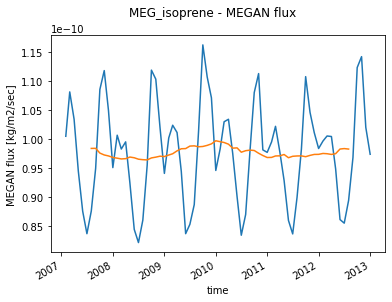

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


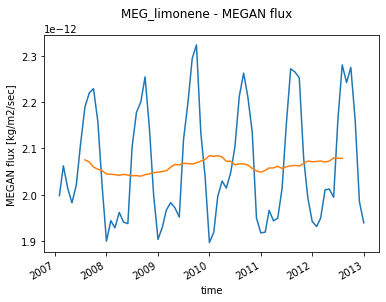

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


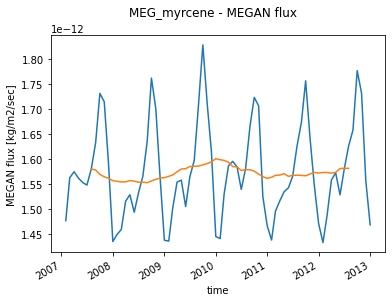

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


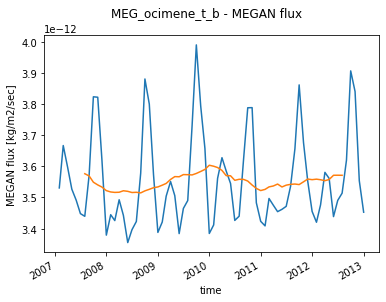

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


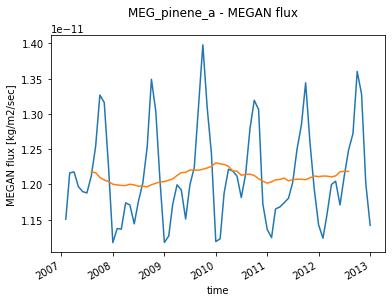

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


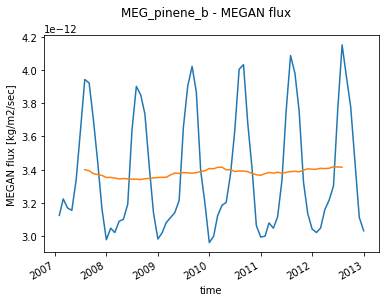

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


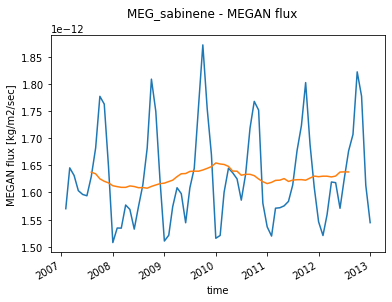

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


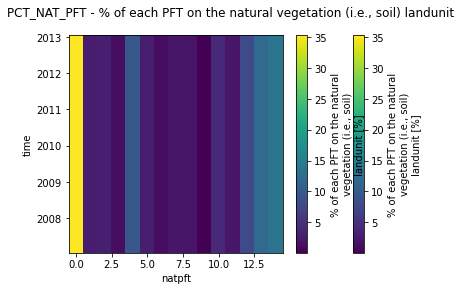

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


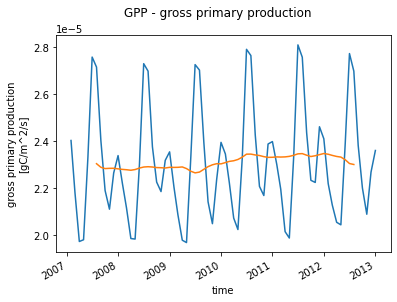

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


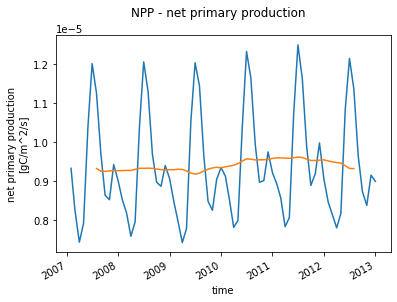

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


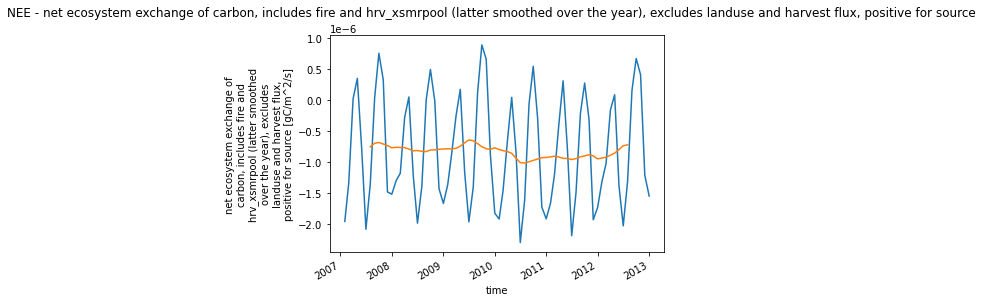

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


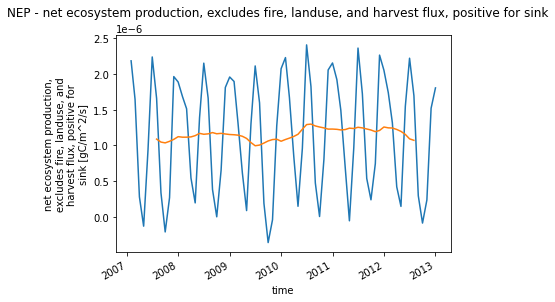

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


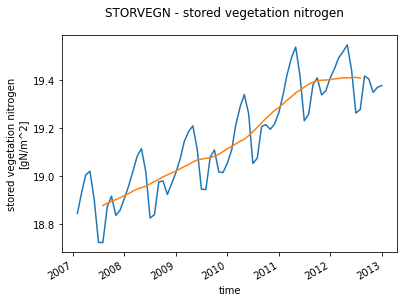

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


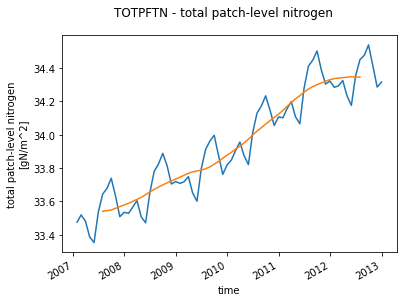

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


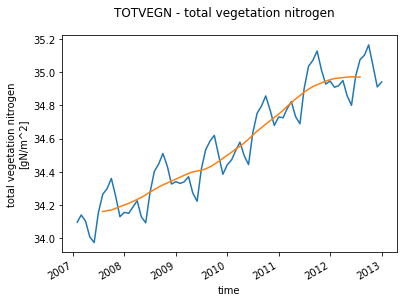

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


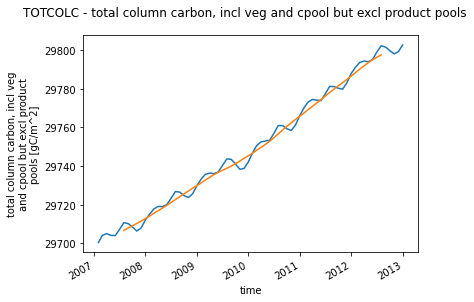

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


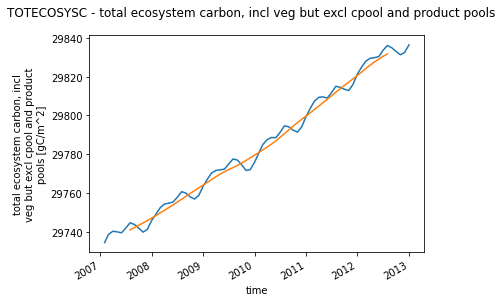

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


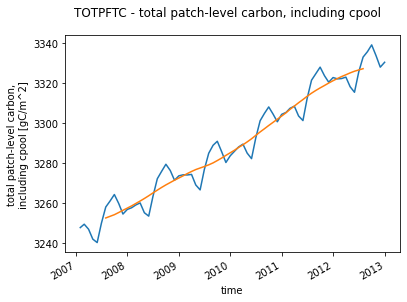

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


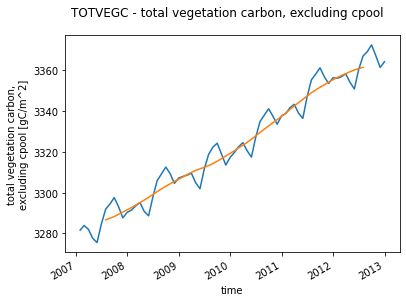

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


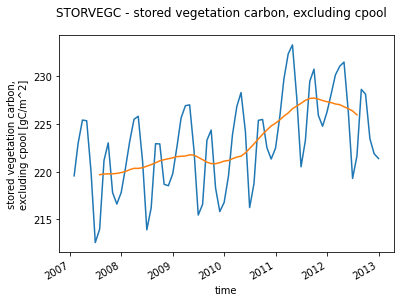

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


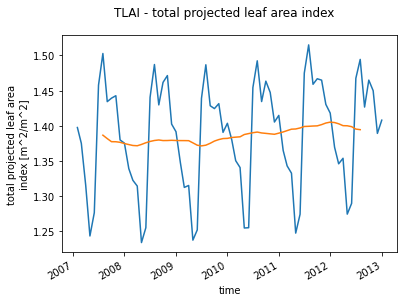

In [24]:

# REAL-ON_2000_sec_nudg_f19_f19

ds3 = create_dataset(casename = 'REAL-ON_2000_sec_nudg_f19_f19')
print_timeseries(ds3)

Files found
Dataset created


/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


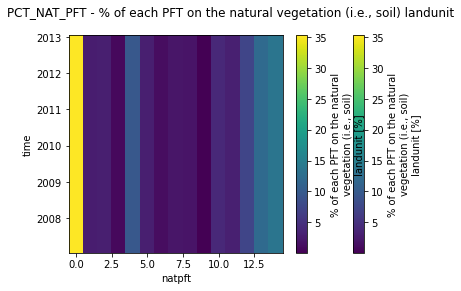

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


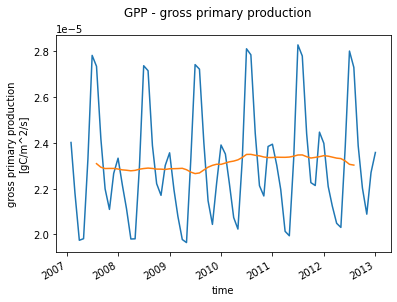

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


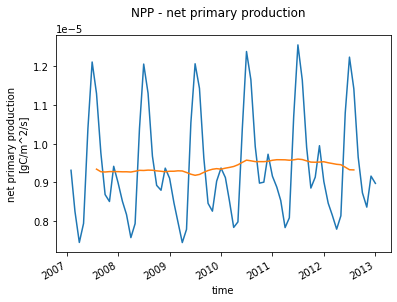

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


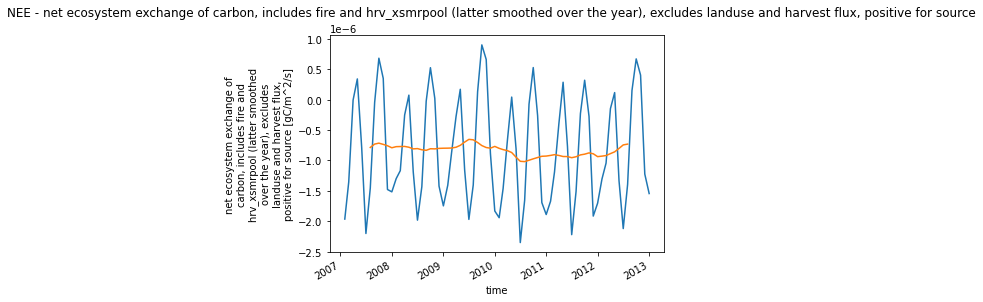

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


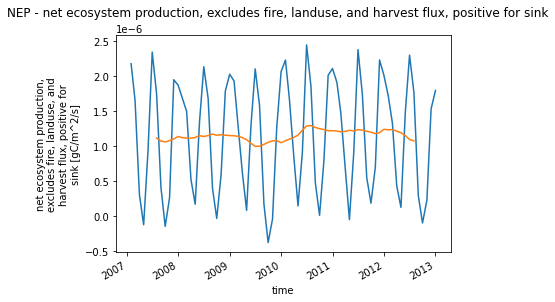

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


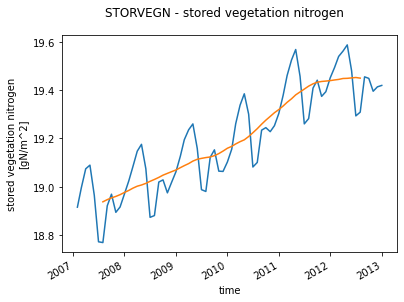

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


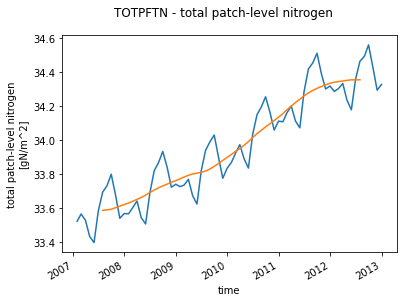

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


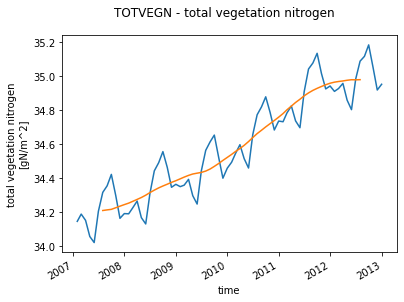

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


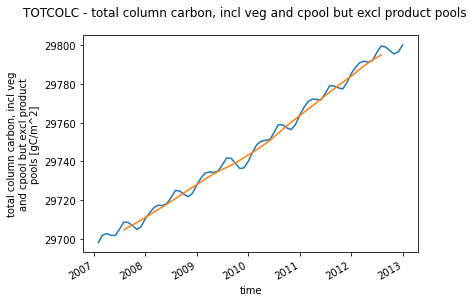

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


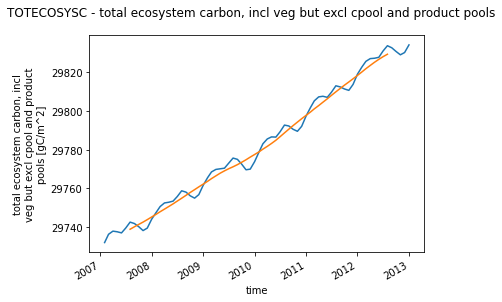

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


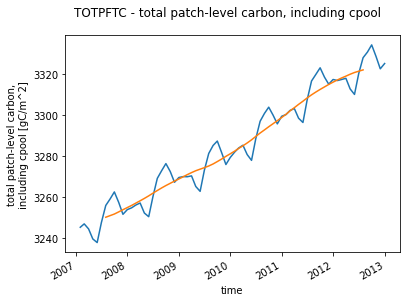

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


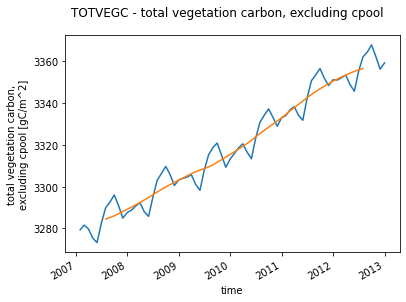

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


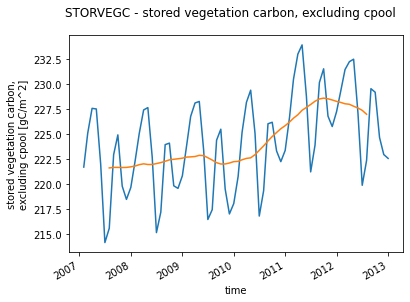

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


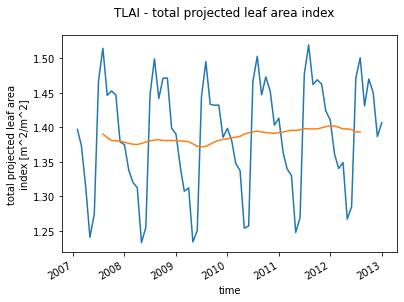

In [22]:
# From Hui's advice
variables = ['area', 'landfrac', 'landmask', 'pftmask', 'PCT_LANDUNIT',
             #'MEG_isoprene', 'MEG_limonene', 'MEG_myrcene', 'MEG_ocimene_t_b', 'MEG_pinene_a', 'MEG_pinene_b', 'MEG_sabinene', 
             'PCT_NAT_PFT', 
             'GPP', 'NPP', 'NEE', 'NEP',
             'STORVEGN', 'TOTPFTN', 'TOTVEGN',
             'TOTCOLC', 'TOTECOSYSC', 'TOTPFTC', 'TOTVEGC', 'STORVEGC',
            'TLAI']

# IDEAL-OFF_2000_sec_nudg_f19_f19

ds2 = create_dataset(casename = 'IDEAL-OFF_2000_sec_nudg_f19_f19')
print_timeseries(ds2)

Files found
Dataset created


/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


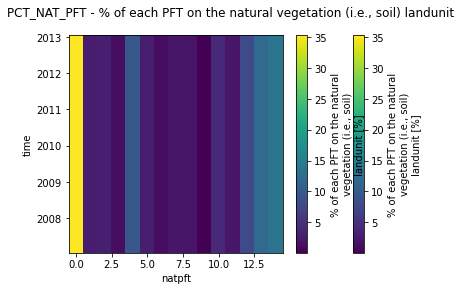

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


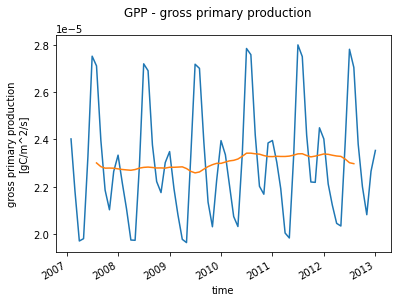

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


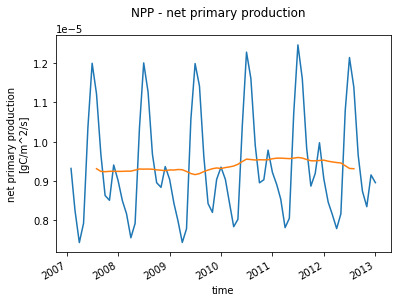

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


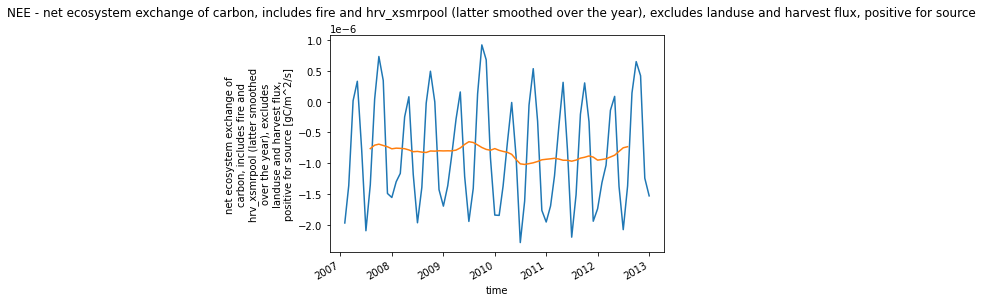

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


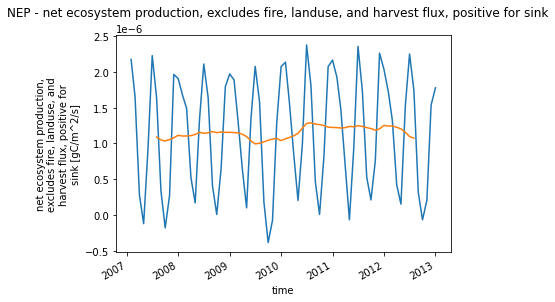

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


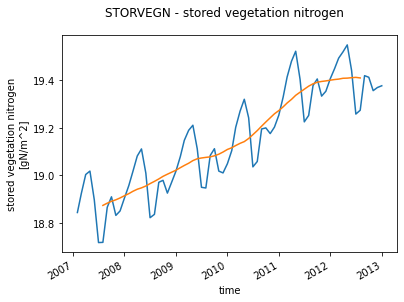

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


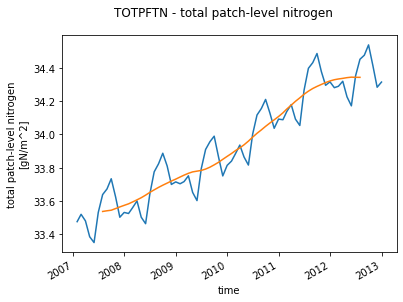

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


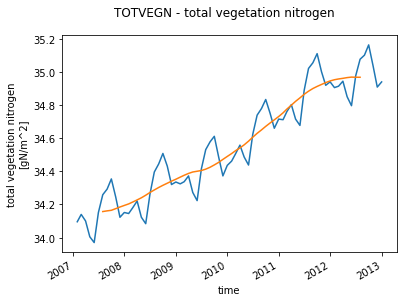

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


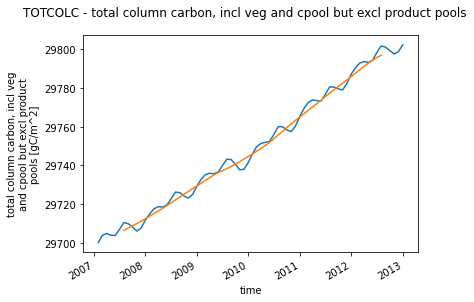

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


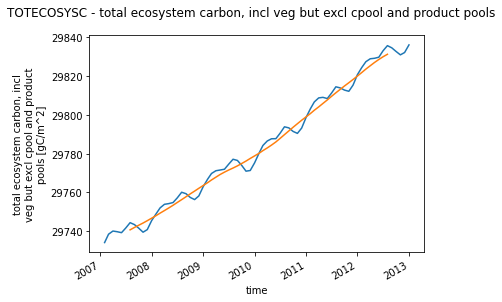

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


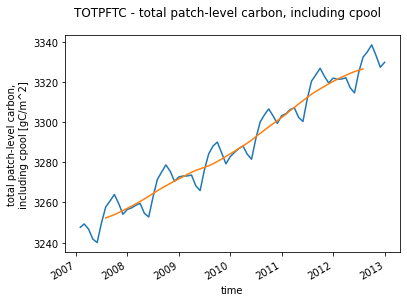

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


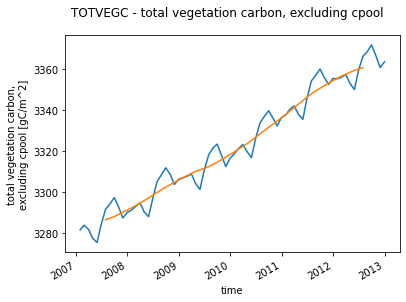

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


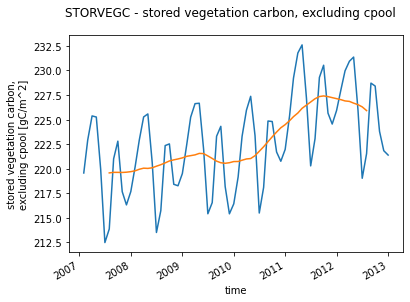

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


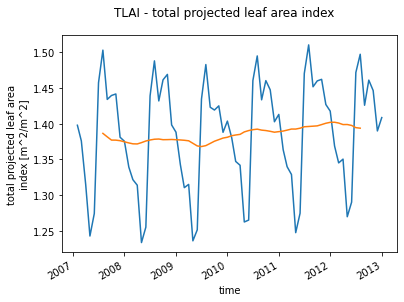

In [23]:
# REAL-OFF_2000_sec_nudg_f19_f19

ds4 = create_dataset(casename = 'REAL-OFF_2000_sec_nudg_f19_f19')
print_timeseries(ds4)